## EDA Techniques
##### 1 - correlation between variables
##### 2 - categorical variables or continuous variables?
##### 3 - relation between number of samples and number of variables
##### 4 - are the samples independent or is it a time series? 
##### 5 - creating new columns to improve and better the analysis and also to manage missing data

In [27]:
#!pip install plotly
!pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\ranga chari\appdata\local\programs\python\python36\lib\site-packages
Requirement already up-to-date: decorator>=4.0.6 in c:\users\ranga chari\appdata\local\programs\python\python36\lib\site-packages (from plotly)
Requirement already up-to-date: nbformat>=4.2 in c:\users\ranga chari\appdata\local\programs\python\python36\lib\site-packages (from plotly)
Requirement already up-to-date: pytz in c:\users\ranga chari\appdata\local\programs\python\python36\lib\site-packages (from plotly)
Requirement already up-to-date: requests in c:\users\ranga chari\appdata\local\programs\python\python36\lib\site-packages (from plotly)
Requirement already up-to-date: six in c:\users\ranga chari\appdata\local\programs\python\python36\lib\site-packages (from plotly)
Requirement already up-to-date: traitlets>=4.1 in c:\users\ranga chari\appdata\local\programs\python\python36\lib\site-packages (from nbformat>=4.2->plotly)
Requirement already up-to-date: jsonsch

Cache entry deserialization failed, entry ignored


In [43]:
import plotly.plotly as py
import plotly.graph_objs as go


import plotly as ply

ply.plotly.sign_in(username='Ranga_Chari', api_key='L9dHdlgu0wpPRNepbtUF')
#py.tools.set_credentials_file(username='Ranga_Chari', api_key='L9dHdlgu0wpPRNepbtUF')

In [47]:
# Import the required packages
%autosave 20
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from biokit.viz import corrplot
#import plotly.plotly as py
#import plotly.graph_objs as go

from datetime import datetime
import pandas_datareader.data as web
#plotly.tools.set_credentials_file(username='Ranga_Chari', api_key='L9dHdlgu0wpPRNepbtUF')

Autosaving every 20 seconds


In [48]:
# Read the CSV file
df=pd.read_csv("C:/Users/Ranga Chari/Documents/energydata_complete.csv")

In [49]:
# Display the column names
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [50]:
# Rename the column names
df.rename(columns={'T1':'Kitchen_Temp','RH_1':'Kitchen_Hum','T2':'LivingRoom_Temp','RH_2':'LivingRoom_Hum',
                   'T3':'LaundryRoom_Temp','RH_3':'LaundryRoom_Hum','T4':'OfficeRoom_Temp','RH_4':'OfficeRoom_Hum',
                   'T5':'BathRoom_Temp','RH_5':'BathRoom_Hum','T6':'OutsideNorth_Temp','RH_6':'OutsideNorth_Hum',
                   'T7':'IroningRoom_Temp','RH_7':'IroningRoom_Hum','T8':'TeenagerRoom_Temp','RH_8':'TeenagerRoom_Hum',
                   'T9':'ParentRoom_Temp','RH_9':'ParentRoom_Hum','T_out':'Outside_Temp','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)

In [51]:
# Display the new column names
df.columns

Index(['date', 'Appliances', 'lights', 'Kitchen_Temp', 'Kitchen_Hum',
       'LivingRoom_Temp', 'LivingRoom_Hum', 'LaundryRoom_Temp',
       'LaundryRoom_Hum', 'OfficeRoom_Temp', 'OfficeRoom_Hum', 'BathRoom_Temp',
       'BathRoom_Hum', 'OutsideNorth_Temp', 'OutsideNorth_Hum',
       'IroningRoom_Temp', 'IroningRoom_Hum', 'TeenagerRoom_Temp',
       'TeenagerRoom_Hum', 'ParentRoom_Temp', 'ParentRoom_Hum', 'Outside_Temp',
       'Pressure', 'Humidity', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [52]:
#Creating a new Column energy_consumed
df['Energy_consumed'] = df['Appliances'] + df['lights']

In [53]:
df.columns

Index(['date', 'Appliances', 'lights', 'Kitchen_Temp', 'Kitchen_Hum',
       'LivingRoom_Temp', 'LivingRoom_Hum', 'LaundryRoom_Temp',
       'LaundryRoom_Hum', 'OfficeRoom_Temp', 'OfficeRoom_Hum', 'BathRoom_Temp',
       'BathRoom_Hum', 'OutsideNorth_Temp', 'OutsideNorth_Hum',
       'IroningRoom_Temp', 'IroningRoom_Hum', 'TeenagerRoom_Temp',
       'TeenagerRoom_Hum', 'ParentRoom_Temp', 'ParentRoom_Hum', 'Outside_Temp',
       'Pressure', 'Humidity', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Energy_consumed'],
      dtype='object')

In [54]:
df = df[['date','Energy_consumed','Appliances', 'lights', 'Kitchen_Temp', 'Kitchen_Hum',
       'LivingRoom_Temp', 'LivingRoom_Hum', 'LaundryRoom_Temp',
       'LaundryRoom_Hum', 'OfficeRoom_Temp', 'OfficeRoom_Hum', 'BathRoom_Temp',
       'BathRoom_Hum', 'OutsideNorth_Temp', 'OutsideNorth_Hum',
       'IroningRoom_Temp', 'IroningRoom_Hum', 'TeenagerRoom_Temp',
       'TeenagerRoom_Hum', 'ParentRoom_Temp', 'ParentRoom_Hum', 'Outside_Temp',
       'Pressure', 'Humidity', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'
       ]]
df

,date,Energy_consumed,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,90,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,90,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,80,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,90,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,100,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,90,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,110,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,110,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,100,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,110,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [55]:
# View the columns
df.head()

,date,Energy_consumed,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,90,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,90,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,80,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,90,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,100,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [56]:
# Data types of colums
df.dtypes

date                  object
Energy_consumed        int64
Appliances             int64
lights                 int64
Kitchen_Temp         float64
Kitchen_Hum          float64
LivingRoom_Temp      float64
LivingRoom_Hum       float64
LaundryRoom_Temp     float64
LaundryRoom_Hum      float64
OfficeRoom_Temp      float64
OfficeRoom_Hum       float64
BathRoom_Temp        float64
BathRoom_Hum         float64
OutsideNorth_Temp    float64
OutsideNorth_Hum     float64
IroningRoom_Temp     float64
IroningRoom_Hum      float64
TeenagerRoom_Temp    float64
TeenagerRoom_Hum     float64
ParentRoom_Temp      float64
ParentRoom_Hum       float64
Outside_Temp         float64
Pressure             float64
Humidity             float64
Windspeed            float64
Visibility           float64
Tdewpoint            float64
rv1                  float64
rv2                  float64
dtype: object

In [57]:
# Converting Date object to Datetime object
df['date']=pd.to_datetime(df['date'])

# Adding day of week column
df['Day_of_week']=df['date'].dt.weekday_name

# Adding month number column
df['Month_Number']=df['date'].dt.month

# Adding Time column
df['Time']=df['date'].dt.time

# Adding month number column
df['Date_number']=df['date'].dt.date

# Geting the weekday number
df["Weekday_number"]=df['date'].dt.weekday

type(df["Day_of_week"])

#Adding Weekday column
if str(df.Day_of_week)=="Sunday" or str(df.Day_of_week)=="Saturday":
    df["Weekday_Column"]=1
else:
    df["Weekday_Column"]=0

In [58]:
df

,date,Energy_consumed,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,Visibility,Tdewpoint,rv1,rv2,Day_of_week,Month_Number,Time,Date_number,Weekday_number,Weekday_Column
0,2016-01-11 17:00:00,90,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,63.000000,5.300000,13.275433,13.275433,Monday,1,17:00:00,2016-01-11,0,0
1,2016-01-11 17:10:00,90,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,59.166667,5.200000,18.606195,18.606195,Monday,1,17:10:00,2016-01-11,0,0
2,2016-01-11 17:20:00,80,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,55.333333,5.100000,28.642668,28.642668,Monday,1,17:20:00,2016-01-11,0,0
3,2016-01-11 17:30:00,90,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,51.500000,5.000000,45.410389,45.410389,Monday,1,17:30:00,2016-01-11,0,0
4,2016-01-11 17:40:00,100,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,...,47.666667,4.900000,10.084097,10.084097,Monday,1,17:40:00,2016-01-11,0,0
5,2016-01-11 17:50:00,90,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,...,43.833333,4.800000,44.919484,44.919484,Monday,1,17:50:00,2016-01-11,0,0
6,2016-01-11 18:00:00,110,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,...,40.000000,4.700000,47.233763,47.233763,Monday,1,18:00:00,2016-01-11,0,0
7,2016-01-11 18:10:00,110,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,...,40.000000,4.683333,33.039890,33.039890,Monday,1,18:10:00,2016-01-11,0,0
8,2016-01-11 18:20:00,100,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,...,40.000000,4.666667,31.455702,31.455702,Monday,1,18:20:00,2016-01-11,0,0
9,2016-01-11 18:30:00,110,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,...,40.000000,4.650000,3.089314,3.089314,Monday,1,18:30:00,2016-01-11,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 36 columns):
date                 19735 non-null datetime64[ns]
Energy_consumed      19735 non-null int64
Appliances           19735 non-null int64
lights               19735 non-null int64
Kitchen_Temp         19735 non-null float64
Kitchen_Hum          19735 non-null float64
LivingRoom_Temp      19735 non-null float64
LivingRoom_Hum       19735 non-null float64
LaundryRoom_Temp     19735 non-null float64
LaundryRoom_Hum      19735 non-null float64
OfficeRoom_Temp      19735 non-null float64
OfficeRoom_Hum       19735 non-null float64
BathRoom_Temp        19735 non-null float64
BathRoom_Hum         19735 non-null float64
OutsideNorth_Temp    19735 non-null float64
OutsideNorth_Hum     19735 non-null float64
IroningRoom_Temp     19735 non-null float64
IroningRoom_Hum      19735 non-null float64
TeenagerRoom_Temp    19735 non-null float64
TeenagerRoom_Hum     19735 non-null float64
ParentRoom

In [60]:
df.describe()

,Energy_consumed,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month_Number,Weekday_number,Weekday_Column
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0
mean,101.496833,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2.977249,0.0
std,104.380829,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,1.985617,0.0
min,10.000000,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000,0.0
25%,50.000000,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000,0.0
50%,60.000000,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000,0.0
75%,100.000000,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000,0.0
max,1110.000000,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,6.000000,0.0


count    19735.000000
mean       101.496833
std        104.380829
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1110.000000
Name: Energy_consumed, dtype: float64


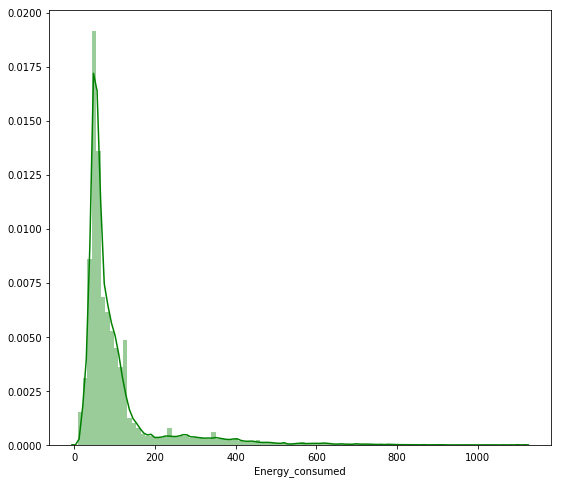

In [61]:
# Plotting the distribution curve of Energy Consumed
print(df['Energy_consumed'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Energy_consumed'], color='g', bins=100, hist_kws={'alpha': 0.4});


In [62]:
# Extracting only numerical values
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Energy_consumed,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month_Number,Weekday_number,Weekday_Column
0,90,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,0
1,90,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,0
2,80,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,0
3,90,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,0
4,100,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,0


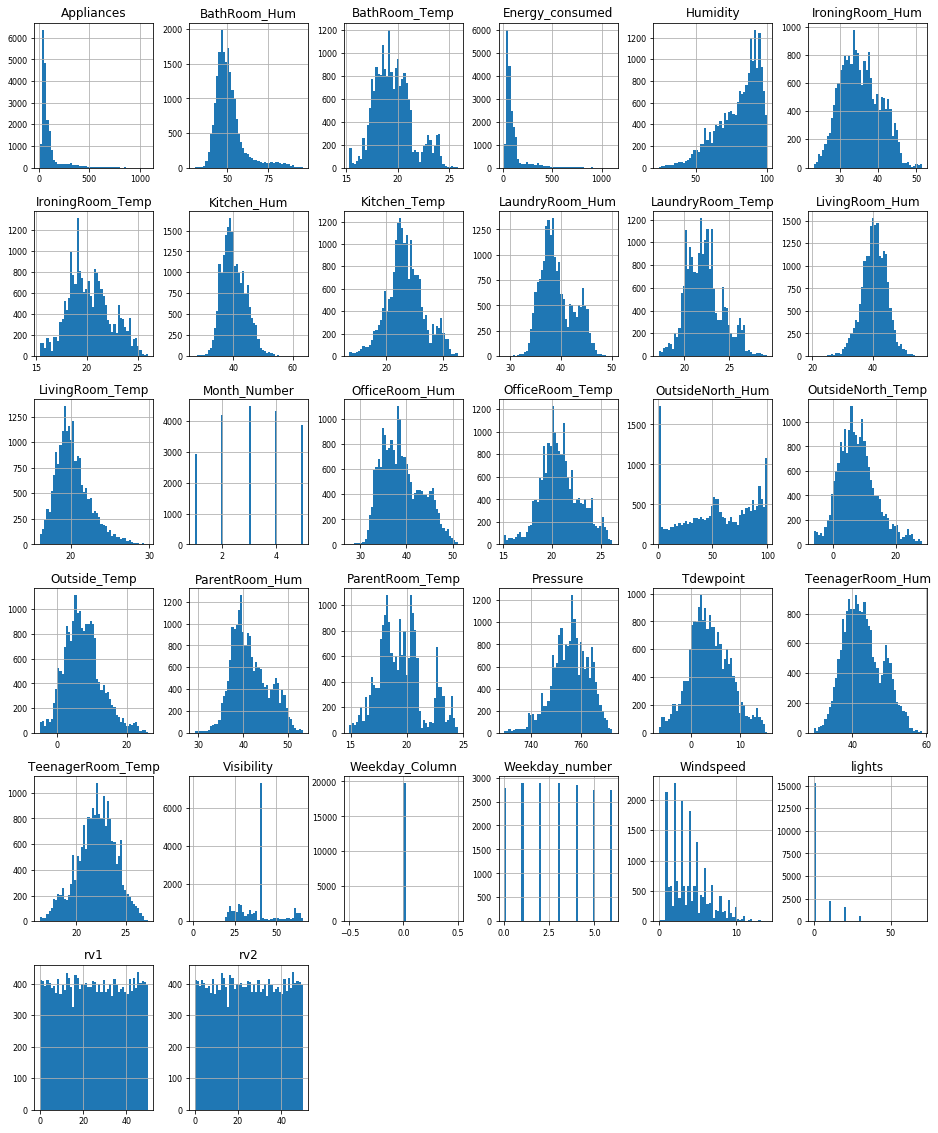

In [63]:
# Plotting histogram of numerical features
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # avoid having the matplotlib verbose informations

In [64]:
# Finding correlated values with Energy_consumed only
df_num_corr =df_num.corr()['Energy_consumed'][0:]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with SalePrice:
Energy_consumed      1.000000
Appliances           0.997218
lights               0.269799
LivingRoom_Temp      0.117511
OutsideNorth_Temp    0.109538
Humidity            -0.144363
Name: Energy_consumed, dtype: float64


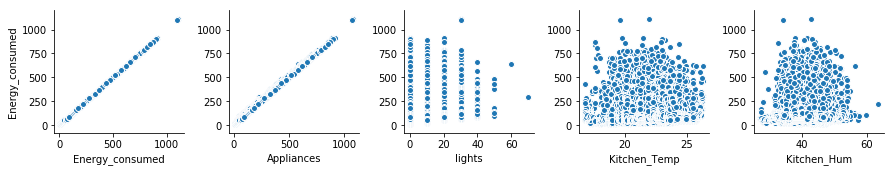

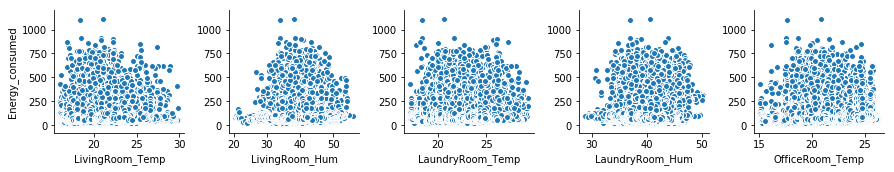

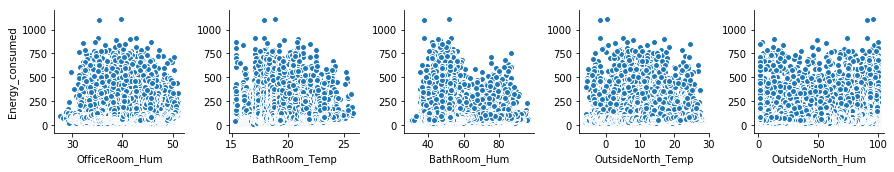

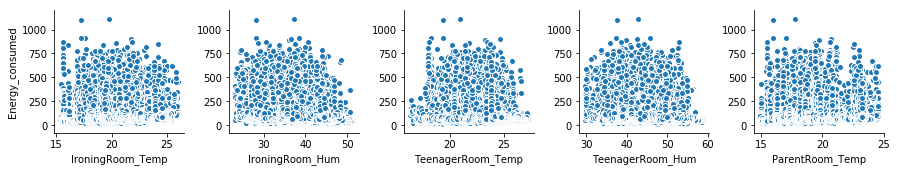

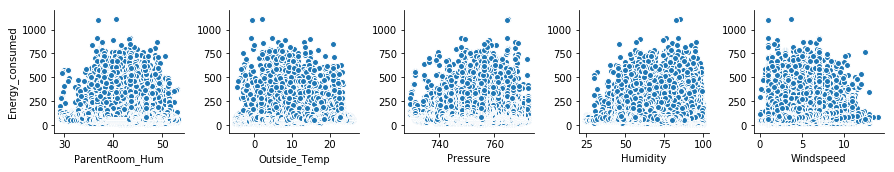

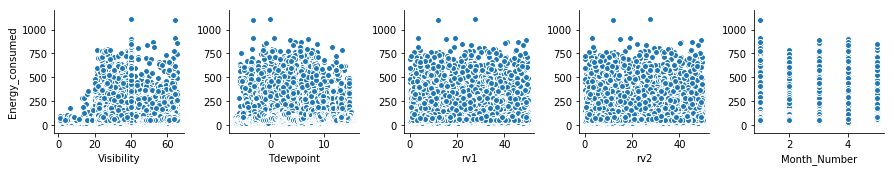

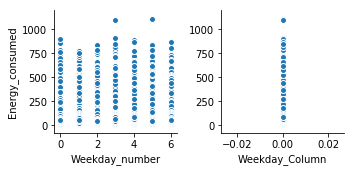

In [65]:
# Scatterplot w.r.t Energy_consumed
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Energy_consumed'])

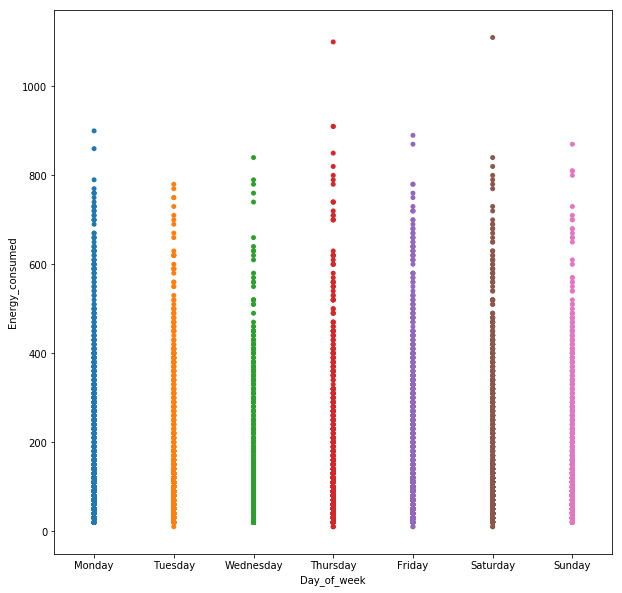

In [66]:
# Strip plot to check which day there was more usage of energy
f, ax = plt.subplots(figsize=(10,10))
ax = sns.stripplot(x="Day_of_week", y="Energy_consumed" , data= df)

In [67]:
#Time Series Plot
data = [go.Scatter(x=df.date, y=df.Energy_consumed)]
py.iplot(data)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Ranga_Chari/0 or inside your plot.ly account where it is named 'plot from API'


In [36]:
df

,date,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314
